In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("C:\\Users\\HP\\Desktop\\original projectsimpli\\machine learning\\project mercedese benz\\train.csv")
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("C:\\Users\\HP\\Desktop\\original projectsimpli\\machine learning\\project mercedese benz\\test.csv")
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
train_target = train["y"]
df_train = train.drop(["y","ID"],axis=1)
df_train.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold=0)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_without_zero_var = variance.fit_transform(df_train.iloc[:,9:])
train_without_zero_var

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
labeled = df_train.iloc[:,0:8]
labeled.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [8]:
labeled_data = labeled.apply(label().fit_transform)
labeled_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [9]:
train_zero_var = pd.DataFrame(train_without_zero_var)
train_zero_var.head()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_data = pd.concat([labeled_data,train_zero_var],axis=1)
train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,32,23,17,0,3,24,9,14,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test = test.drop(['ID'],axis=1)
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
test_without_zero_var = variance.fit_transform(test.iloc[:,9:])
test_without_zero_var

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
test_data = pd.DataFrame(test_without_zero_var)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
labeled = test.iloc[:,0:8]
labeled.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [15]:
labeled_data = labeled.apply(label().fit_transform)
labeled_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


In [16]:
test_data1 = pd.concat([labeled_data, test_data],axis=1)
test_data1.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,352,353,354,355,356,357,358,359,360,361
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(train_data,train_target,random_state=42,test_size=0.3)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2946, 363), (1263, 363), (2946,), (1263,))

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [21]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [22]:
from sklearn import svm
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state=42)

In [23]:
model =xgbr.fit(x_train,y_train)

In [25]:
ypred_test = model.predict(x_test)
ypred_test

array([ 89.92478,  92.23022, 106.76723, ...,  93.1157 , 100.5901 ,
       107.29518], dtype=float32)

In [26]:
ypred_train= model.predict(x_train)
ypred_train

array([ 93.82634 , 111.754364, 109.68195 , ...,  99.46664 ,  93.587746,
        94.289566], dtype=float32)

In [27]:
print(r2_score(ypred_train,y_train))

0.6854826904515524


In [28]:
print(mean_squared_error(ypred_train,y_train))

28.587957391170832


In [33]:
prediction = pd.DataFrame({'ytest':y_test,'ypred':ypred_test})

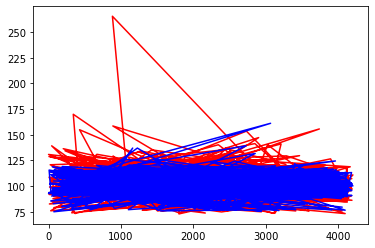

In [35]:
plt.plot(prediction['ytest'],color='red')
plt.plot(prediction['ypred'],color='blue')
plt.show()